# Preprocessing
In this Notebook, we'll do the following.

* Select and merge labels from the full ADE20k dataset that we want to keep
* Select the scenes from the full ADE20k dataset that we want to use for training
* Create new annotation images for each of the selected scenes
* Store this newly created dataset in the PASCAL VOC format
* Visualize the scenes and their annotations side-by-side

In [1]:
import matplotlib.pyplot as plt
from conversion import *

In [2]:
# This is the path to the full ADE20K dataset unzipped.
SRC_DIR = "../../datasets/ADE20K_2016_07_26/"

# This is the destination directory that will store the newly
# generated dataset. This directory will be created during the 
# dataset generation process.
DEST_DIR = "../../datasets/bedroom_scenes_voc"

# TODO: Select scenes of interest to keep using keywords.
required_keywords = [
    'bedroom', 'childs_room', 'dorm_room', 'hotel_room',  
]

# TODO: Select keywords that cannot be in the sample name. "Outdoor" is
# a common choice here to choose indoor vs outdoor garage scenes, for 
# example.
reject_keywords = ["outdoor", ]

# This list of tuples represents the new label encoding we will be using.
# Each tuple contains all of the classes we'll combine together.
want_labels = [
    ('background', ),
    ('door', 'doorframe, doorcase', 'double door'),
    ('bed', 'bedpost', 'blanket, cover', 'headboard',),
    ('wardrobe, closet, press', ),
    ('lamp', ),
    ('chest of drawers, chest, bureau, dresser', 'chest'),
    ('pillow', ),
    ('armchair', 'chair', 'swivel chair'),
    ('pane, pane of glass, window glass', 'windowpane, window',),
    ('curtain, drape, drapery, mantle, pall',),
    ('mirror',),
    ('painting, picture', 'frame',),
    ('wall',),
    ('ceiling',),
    ('floor, flooring',),
    ('cabinet', )
]

In [3]:
%%time
convert_to_voc(SRC_DIR,
                  DEST_DIR,
                  required_keywords=required_keywords,
                  reject_keywords=reject_keywords,
                  want_labels=want_labels)

Partition training has 1679.
Partition validation has 168.
ADE20K dataset has been converted and stored in ../../datasets/bedroom_scenes_voc
Label mapping has been stored in ../../datasets/bedroom_scenes_voc/labelmap.json
CPU times: user 10min 20s, sys: 45.2 s, total: 11min 6s
Wall time: 11min 11s


## Visualize New Segmentation Masks
Now that the dataset is generated, we can visualize the annotations.

In [8]:
# Reads the text file to detect the names of all sample instances in the
# partition of interest.
VOC_DIR = os.path.join(DEST_DIR, "VOCdevkit/VOC2012")
partition = "train"  # This can be "train" or "val"

partition_filepath = os.path.join(VOC_DIR, f"ImageSets/Segmentation/{partition}.txt")
with open(partition_filepath) as rf:
    samples = rf.readlines()
    samples = [sample.strip() for sample in samples]
    
n_samples = len(samples)
img_paths = [os.path.join(VOC_DIR, f'JPEGImages/{s}.jpg') for s in samples]
seg_paths = [os.path.join(VOC_DIR, f'SegmentationClass/{s}.png') for s in samples]

In [9]:
label_to_new_id = get_voc_labelmap(DEST_DIR)
new_id_to_label = {new_id: label for (label, new_id) in label_to_new_id.items()}

def show_random_sample():
    """
    This helper function picks a random sample and displays the
    image and its annotations.
    """
    idx = np.random.randint(n_samples)
    img_fp, seg_fp = img_paths[idx], seg_paths[idx]
    
    plt.figure(dpi=200)
    plt.imshow(imread(img_fp))
    plt.axis("off")
    disp_seg(imread(seg_fp), new_id_to_label)

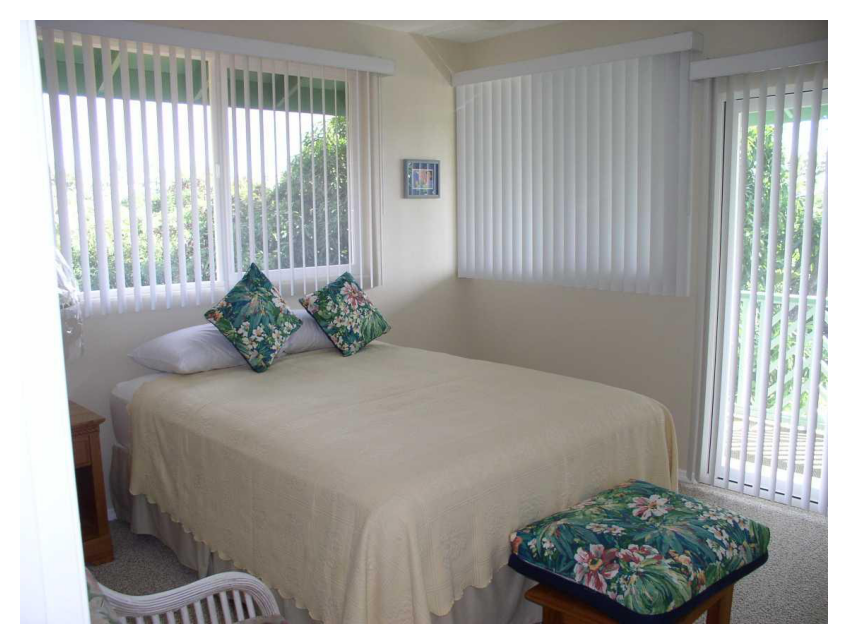

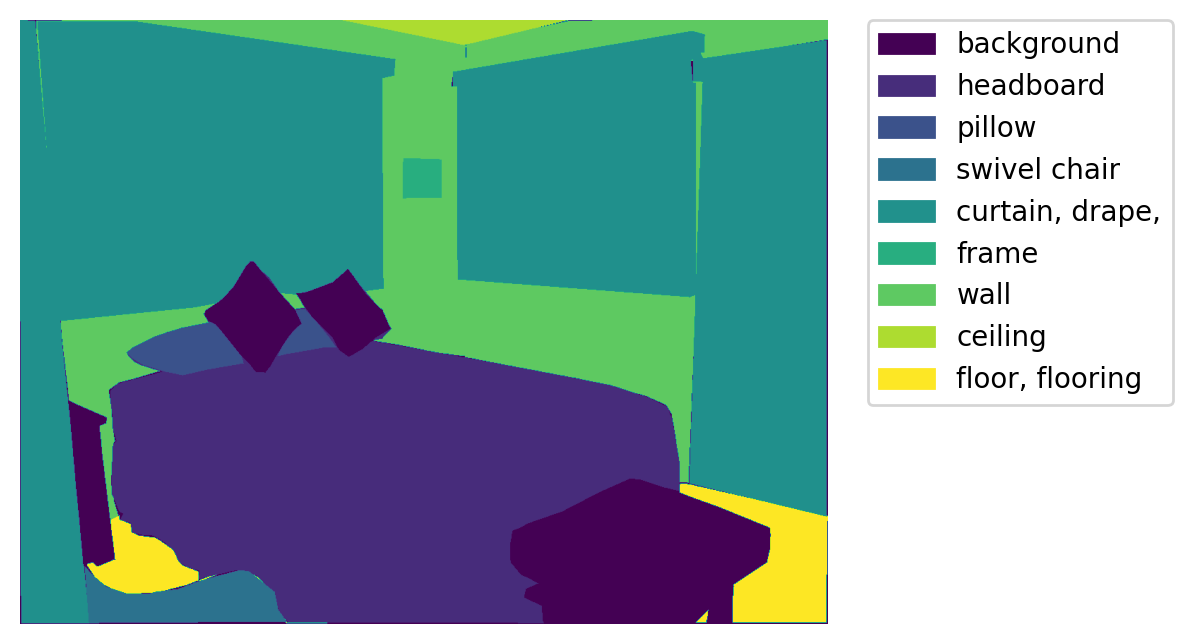

In [10]:
show_random_sample()

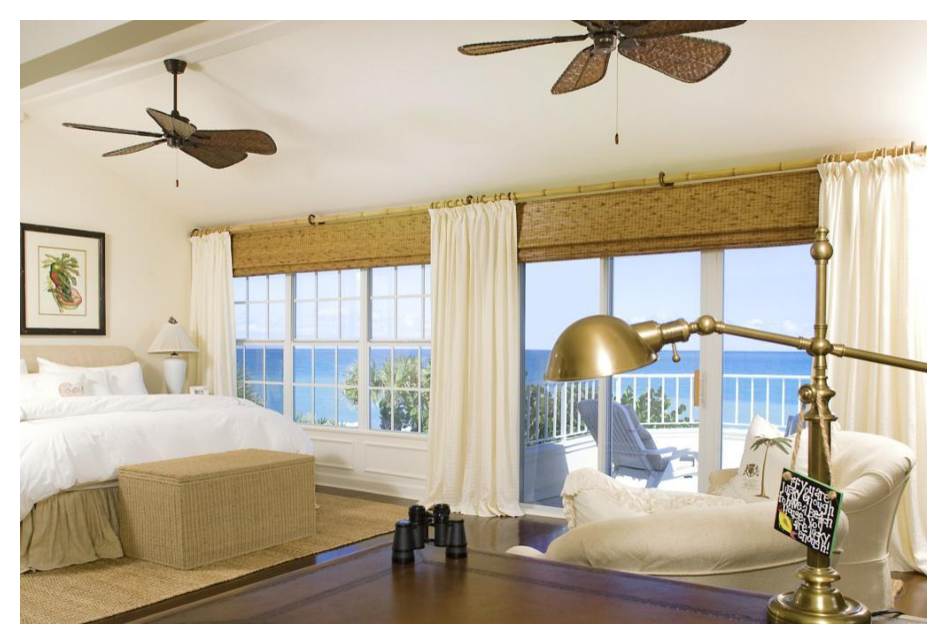

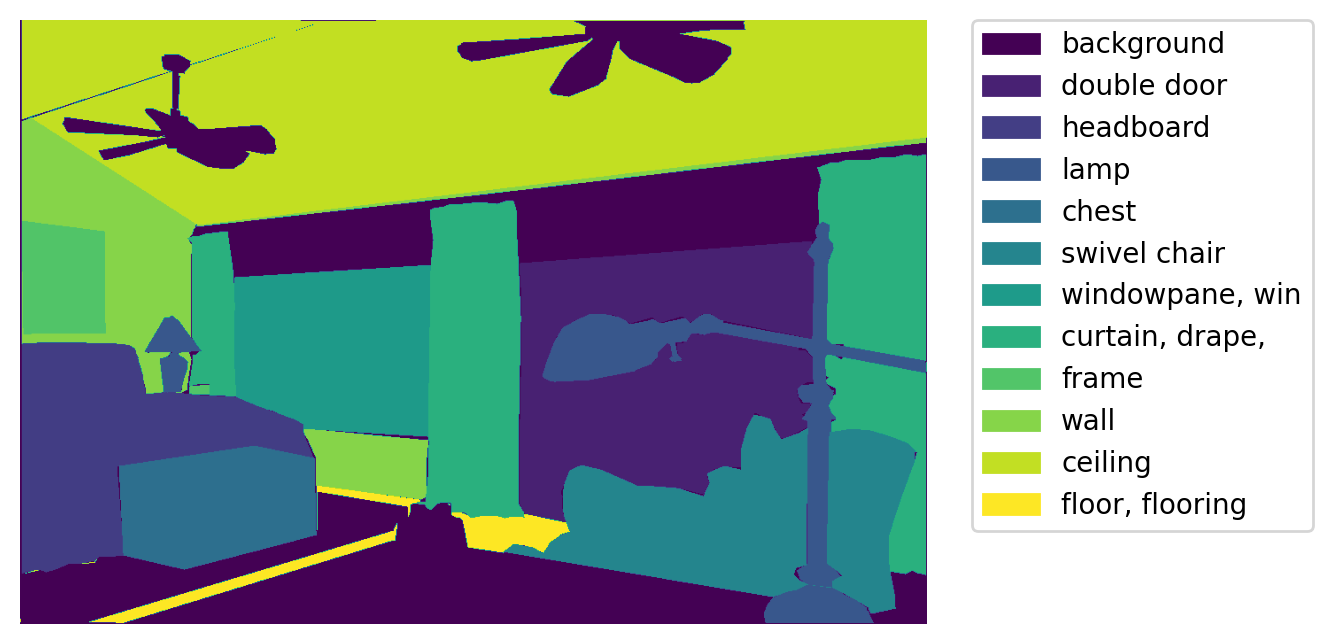

In [11]:
show_random_sample()

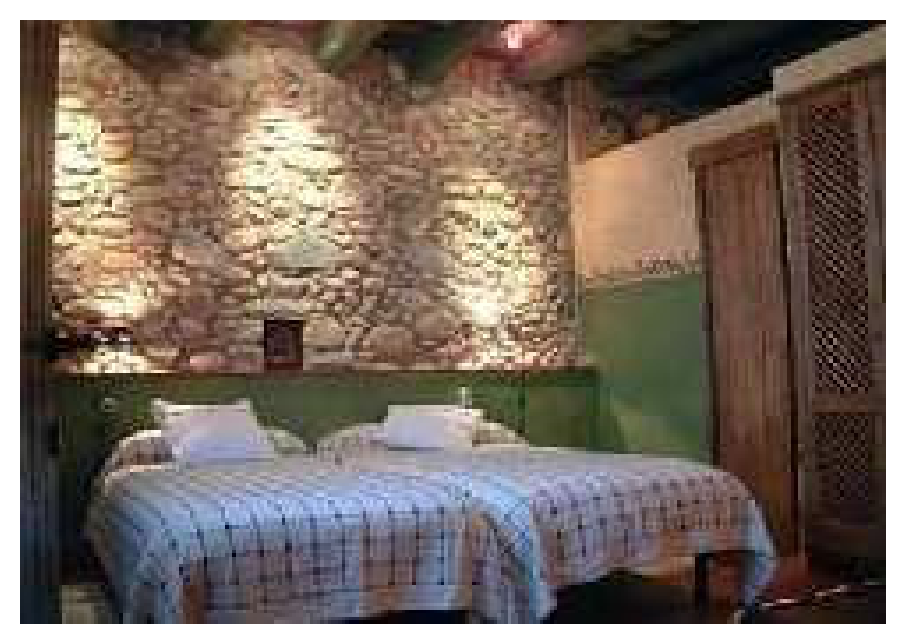

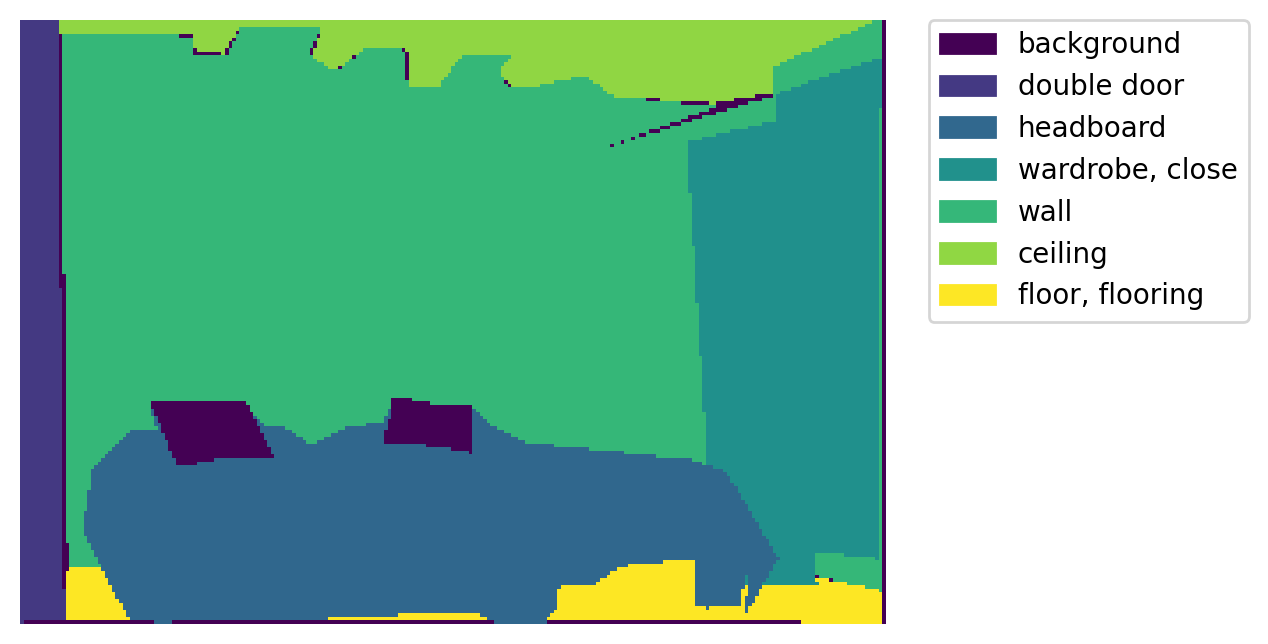

In [12]:
show_random_sample()